In [6]:
#imports
from qiskit_ionq import IonQProvider
ionq_provider = IonQProvider(token='API-Key-goes-here')
import numpy as np

from qiskit import QuantumCircuit, execute, Aer
from qiskit.tools.visualization import plot_histogram, array_to_latex
from qiskit.extensions import UnitaryGate

### All to all connectivity

Ion trap quantum computer features all-to-all connectivity. This can significantly boost the fidelity when executing the circuit on actual hardwares

<img src='files/connectivity.png'/>

All-to-all connectivity means two-qubit gates are available among all qubits. In contrast, on system with limited connectivity, two-qubit gates are only available among pairs that are physically connectied. To run gates between non-connected pairs, swap gates are needed.
<img src='files/swap_gate.png'/>

The swap gate consists of three CNOT gates, which contribute non-trivially to the errors

In [7]:
swap_gate=QuantumCircuit(2)
swap_gate.cx(0,1)
swap_gate.cx(1,0)
swap_gate.cx(0,1)
swap_gate.draw()

┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘

### example: non-local cnot gate

Assume we want to do CNOT gate between 0 and 3

<img src='files/example.png'/>


In [8]:
ata = QuantumCircuit(4)
ata.h(0)
ata.cx(0,3)
ata.measure_all()
ata.draw()


┌───┐      ░ ┌─┐         
   q_0: ┤ H ├──■───░─┤M├─────────
        └───┘  │   ░ └╥┘┌─┐      
   q_1: ───────┼───░──╫─┤M├──────
               │   ░  ║ └╥┘┌─┐   
   q_2: ───────┼───░──╫──╫─┤M├───
             ┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ─────┤ X ├─░──╫──╫──╫─┤M├
             └───┘ ░  ║  ║  ║ └╥┘
meas: 4/══════════════╩══╩══╩══╩═
                      0  1  2  3

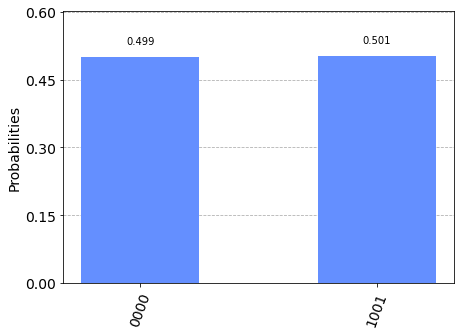

In [11]:
backend = ionq_provider.get_backend("ionq_simulator")#choose your backend
job = execute(ata, backend,shots=5000) #get the job object

  
result = job.result() # get result object
counts = result.get_counts() #get the counts dictionary
fig=plot_histogram(counts) #plot the histogram of the counts    
ax = fig.axes[0]
fig 

In [12]:
lmt = QuantumCircuit(4)
lmt.h(0)
lmt.cx(1,3)
lmt.cx(3,1)
lmt.cx(1,3)
lmt.cx(0,1)
lmt.cx(1,3)
lmt.cx(3,1)
lmt.cx(1,3)
lmt.measure_all()
lmt.draw()


┌───┐                               ░ ┌─┐         
   q_0: ┤ H ├────────────■──────────────────░─┤M├─────────
        └───┘┌───┐     ┌─┴─┐     ┌───┐      ░ └╥┘┌─┐      
   q_1: ──■──┤ X ├──■──┤ X ├──■──┤ X ├──■───░──╫─┤M├──────
          │  └─┬─┘  │  └───┘  │  └─┬─┘  │   ░  ║ └╥┘┌─┐   
   q_2: ──┼────┼────┼─────────┼────┼────┼───░──╫──╫─┤M├───
        ┌─┴─┐  │  ┌─┴─┐     ┌─┴─┐  │  ┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ X ├──■──┤ X ├─────┤ X ├──■──┤ X ├─░──╫──╫──╫─┤M├
        └───┘     └───┘     └───┘     └───┘ ░  ║  ║  ║ └╥┘
meas: 4/═══════════════════════════════════════╩══╩══╩══╩═
                                               0  1  2  3

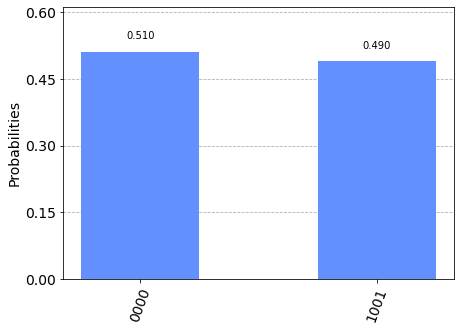

In [13]:
backend = ionq_provider.get_backend("ionq_simulator")#choose your backend
job = execute(lmt, backend,shots=5000) #get the job object

  
result = job.result() # get result object
counts = result.get_counts() #get the counts dictionary
fig=plot_histogram(counts) #plot the histogram of the counts    
ax = fig.axes[0]
fig 